<a href="https://colab.research.google.com/github/cassyrr/Hotel-Booking-Data-Project/blob/main/Hotel_Bookings_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###1: Get the Datasets

* Datasets are all from Kaggle.

* Explain Datasets (3 datasets in total):

I have chosen the **Hotel Bookings dataset** as the central focus of my final project, driven by several compelling factors:

Firstly, the dataset contains comprehensive information, covering a wide range of details for each booking—from hotel types to guests' details. This wealth of data enables me to conduct a thorough analysis.

Secondly, the dataset's emphasis on booking details positions it as an invaluable resource for delving into customer behavior — a universally significant topic across various industries. My goal is to utilize exploratory analysis and machine learning in a real-world scenario to understand how to map customer behavior from data and apply these insights to benefit the companies' business strategies.

Moreover, I have integrated the **World Happiness Score** from 2016 into this analysis with the aim of establishing a connection between customer behavior and the happiness score of the region each customer originates from. This exploration seeks to uncover correlations that could be valuable for segmenting customers and predicting booking patterns, ultimately enhancing services and customer experiences. Since the hotel booking dataset is about year 2015 - 2017, so I used the 2016 happiness score as an average value provides a meaningful metric for correlation analysis.

Recognizing the discrepancy in the format of the 'region' column between the Hotel Bookings dataset and the happiness score dataset, I included an additional dataset mapping the code to the full name for each region to ensure consistency during the merging process.

###2: Explore the Datasets

(1) Uploading Datasets and Displaying Initial Rows

* First of all, I imported the basic libraries to upload datasets and prepare for the exploratory analysis.

* During this step, I uploaded all three datasets to GitHub and utilized their URLs to download them into the Colab environment. Employing the head() function, I displayed the initial five rows of each dataset, providing a glimpse into their contents.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# upload main dataset
hotel_booking = pd.read_csv("https://raw.githubusercontent.com/cassyrr/Hotel-Booking-Data-Project/main/hotel_bookings.csv")
hotel_booking.head(3)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15


In [ ]:
# upload second dataset
happiness_2016 = pd.read_csv('https://raw.githubusercontent.com/cassyrr/Hotel-Booking-Data-Project/main/world_happiness_2016.csv')
happiness_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [ ]:
# upload third dataset
country_code = pd.read_csv('https://raw.githubusercontent.com/cassyrr/Hotel-Booking-Data-Project/main/country%20aliases%20(wiki-List%20of%20alternative%20country%20names).csv')
country_code.head(10)

,iso3,Alias,AliasDescription
0,NaN,Abkhazia,"common, English"
1,NaN,Republic of Abkhazia,"official, English"
2,NaN,Aphsny Axwynthkharra,"official, Abkhaz"
3,NaN,Respublika Abkhaziya,"official, Russian"
4,NaN,Autonomous Republic of Abkhazia,"Internationally recognized, English"
5,AFG,Afghanistan,"common, English"
6,AFG,Islamic Republic of Afghanistan,"official, English"
7,AFG,Da Afganistan Islami Jumhoryat,"official, Pashto"
8,AFG,Jomhuriyyeh Eslamiyyeh Afganestan,"official, Dari"
9,ALB,Albania,"common, English"


(2) Intergrating Happiness Score Into Hotel Bookings Dataset

* In this step, I **merged three datasets** to augment the Hotel Bookings dataset with a new column representing the Happiness Score of customers' regions. The process involved linking the abbreviated country names in the hotel booking dataset with the full names in the happiness score dataset.

* I initiated the process by linking the happiness dataset with a reference dataset that includes both full names and abbreviation codes for countries. This **transformation** was implemented to standardize the format of country values to align with the hotel booking dataset. Subsequently, leveraging the abbreviated codes, I established a connection between the happiness score dataset and the hotel booking dataset.

In [ ]:
# First link happiness score and courtry code to convert full region name in happiness score into code

# select the useful columns to reduce the size for further manipulation
happiness_2016_filterd = happiness_2016[['Country','Happiness Score']]
country_code_filterd = country_code[['iso3', 'Alias']]

# link country_code and happiness_2016 first
happiness_2016_updated = pd.merge(happiness_2016_filterd, country_code_filterd, left_on ='Country', right_on ='Alias', how = 'inner')[['iso3', 'Happiness Score']]

# link happiness_2016 and hotel booking
hotel_booking_updated = pd.merge(happiness_2016_updated, hotel_booking, left_on = 'iso3', right_on = 'country', how = 'inner')
hotel_booking_updated.head(5)


,iso3,Happiness Score,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,DNK,7.526,228,Resort Hotel,0,100,2015,July,28,8,...,No Deposit,240.0,NaN,0,Transient-Party,130.1,0,3,Check-Out,17-07-15
1,DNK,7.526,229,Resort Hotel,0,100,2015,July,28,8,...,No Deposit,240.0,NaN,0,Transient-Party,100.1,0,2,Check-Out,17-07-15
2,DNK,7.526,277,Resort Hotel,0,32,2015,July,28,10,...,No Deposit,241.0,NaN,0,Transient,105.9,0,0,Check-Out,23-07-15
3,DNK,7.526,435,Resort Hotel,0,13,2015,July,29,16,...,No Deposit,240.0,NaN,0,Transient,120.6,0,1,Check-Out,18-07-15
4,DNK,7.526,443,Resort Hotel,0,66,2015,July,29,16,...,No Deposit,240.0,NaN,0,Transient,103.5,0,1,Check-Out,18-07-15


(3) Exploratory Data Analysis (EDA)

* During this phase, I conducted an initial exploration to gain a comprehensive understanding of the dataset and verify its quality.

* I employed visualization techniques to unveil the distribution, patterns, and relationships among variables, aiming to extract meaningful insights for deeper analysis.

In [ ]:
# Select the columns that I'm going to work with
hotel_bookings = hotel_booking_updated[['Happiness Score', 'hotel', 'is_canceled', 'lead_time', "arrival_date_year", 'arrival_date_month', 'country', 'market_segment', 'reserved_room_type', 'adr','deposit_type']]
hotel_bookings.head(5)

,Happiness Score,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,country,market_segment,reserved_room_type,adr,deposit_type
0,7.526,Resort Hotel,0,100,2015,July,DNK,Online TA,E,130.1,No Deposit
1,7.526,Resort Hotel,0,100,2015,July,DNK,Online TA,E,100.1,No Deposit
2,7.526,Resort Hotel,0,32,2015,July,DNK,Online TA,C,105.9,No Deposit
3,7.526,Resort Hotel,0,13,2015,July,DNK,Online TA,A,120.6,No Deposit
4,7.526,Resort Hotel,0,66,2015,July,DNK,Online TA,A,103.5,No Deposit


In [ ]:
# obtain the size of the dataset
hotel_bookings.shape

(129706, 11)

In [ ]:
# obtain all the variables and data type
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129706 entries, 0 to 129705
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Happiness Score     129706 non-null  float64
 1   hotel               129706 non-null  object 
 2   is_canceled         129706 non-null  int64  
 3   lead_time           129706 non-null  int64  
 4   arrival_date_year   129706 non-null  int64  
 5   arrival_date_month  129706 non-null  object 
 6   country             129218 non-null  object 
 7   market_segment      129706 non-null  object 
 8   reserved_room_type  129706 non-null  object 
 9   adr                 129706 non-null  float64
 10  deposit_type        129706 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 11.9+ MB


* The original dataset comprises 129,706 datapoints and 35 variables. After I dropped some columns that I'm not using, it contains 11 variables now.

* Given the relatively large number of variables, I will specifically elaborate on the meanings of the variables pertinent to the subsequent analyses.

In [ ]:
# check missing value
hotel_bookings.isnull().sum()

Happiness Score         0
hotel                   0
is_canceled             0
lead_time               0
arrival_date_year       0
arrival_date_month      0
country               488
market_segment          0
reserved_room_type      0
adr                     0
deposit_type            0
dtype: int64

* In the dataset, **missing values** are identified in "country" (origin of guests)column.

* Given the substantial amount of available data and the significance of the column to my research questions, coupled with the current unavailability of data to fill these gaps, I have opted to remove the rows with null values for enhancing the accuracy of subsequent analyses.

In [ ]:
# drop null rows
hotel_bookings_clean = hotel_bookings.dropna()
hotel_bookings_clean.isnull().sum() # check again, no null presents

Happiness Score       0
hotel                 0
is_canceled           0
lead_time             0
arrival_date_year     0
arrival_date_month    0
country               0
market_segment        0
reserved_room_type    0
adr                   0
deposit_type          0
dtype: int64

In [ ]:
# check any noise/unusual value
hotel_bookings_clean.describe()

,Happiness Score,is_canceled,lead_time,arrival_date_year,adr
count,129218.000000,129218.000000,129218.000000,129218.000000,129218.000000
mean,6.073959,0.356599,106.626360,2016.169620,101.363641
std,0.834051,0.478997,107.313674,0.705253,50.181457
min,2.905000,0.000000,0.000000,2015.000000,-6.380000
25%,5.123000,0.000000,20.000000,2016.000000,68.000000
50%,6.361000,0.000000,72.000000,2016.000000,94.400000
75%,6.725000,1.000000,164.000000,2017.000000,125.500000
max,7.526000,1.000000,737.000000,2017.000000,5400.000000


* Upon examining the distribution overview, the following observations were made:

-- The "is_canceled" column is binary, indicating whether a booking is canceled or not.

-- Unusual minimum or maximum values were identified in column "adr" (average daily rate per room, with some instances showing a negative rate).

In [ ]:
# drop negative price per room
hotel_bookings_clean = hotel_bookings_clean[hotel_bookings_clean['adr']>0]

# check again
hotel_bookings_clean.describe() # the negative price value has been removed

,Happiness Score,is_canceled,lead_time,arrival_date_year,adr
count,127217.000000,127217.000000,127217.000000,127217.000000,127217.000000
mean,6.083692,0.360596,107.648058,2016.173247,102.958093
std,0.832904,0.480175,107.329411,0.704331,48.924571
min,2.905000,0.000000,0.000000,2015.000000,0.260000
25%,5.123000,0.000000,21.000000,2016.000000,70.000000
50%,6.361000,0.000000,74.000000,2016.000000,95.000000
75%,6.725000,1.000000,165.000000,2017.000000,126.000000
max,7.526000,1.000000,709.000000,2017.000000,5400.000000


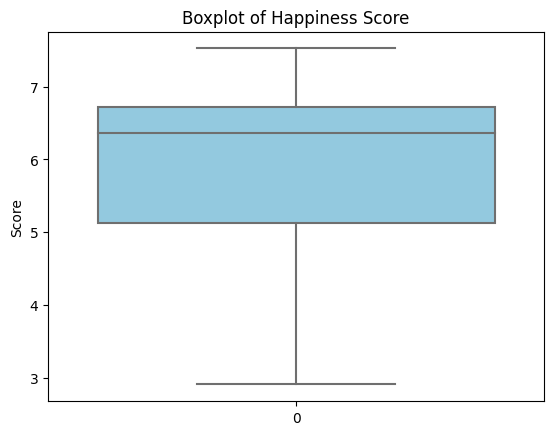

In [ ]:
# visualize distribution

# boxplot happiness score
sns.boxplot(hotel_bookings_clean['Happiness Score'], color= 'skyblue')
plt.title("Boxplot of Happiness Score")
plt.ylabel("Score")
plt.show()

* Based on the boxplot depicting the happiness scores according to the origin of guests, the majority of guests from the region have happiness scores above 5, with a median around 6.5.

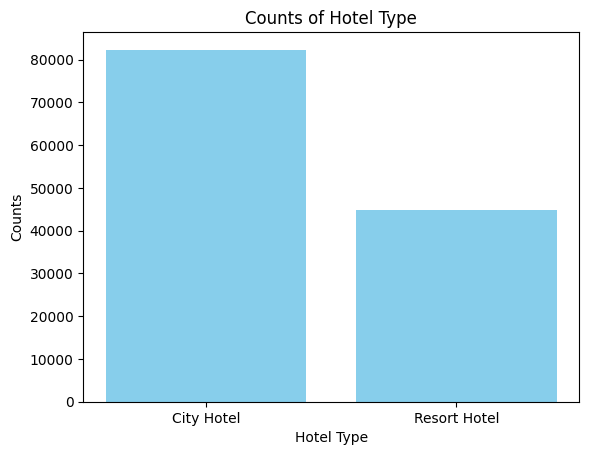

In [ ]:
# bar chart for hotel categories
hotel_types = hotel_bookings_clean['hotel'].value_counts()

plt.bar(hotel_types.index, hotel_types.values, color = 'skyblue')
plt.title("Counts of Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Counts")
plt.show()

* Upon examining the bar chart illustrating the counts of different types of hotels, it is evident that the City Hotel accommodates approximately twice as many guests as the Resort Hotel.

In [ ]:
hotel_bookings_clean.head(5)

,Happiness Score,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,country,market_segment,reserved_room_type,adr,deposit_type
0,7.526,Resort Hotel,0,100,2015,July,DNK,Online TA,E,130.1,No Deposit
1,7.526,Resort Hotel,0,100,2015,July,DNK,Online TA,E,100.1,No Deposit
2,7.526,Resort Hotel,0,32,2015,July,DNK,Online TA,C,105.9,No Deposit
3,7.526,Resort Hotel,0,13,2015,July,DNK,Online TA,A,120.6,No Deposit
4,7.526,Resort Hotel,0,66,2015,July,DNK,Online TA,A,103.5,No Deposit


**Summary of Initial Data Exploration:**

(1) Data Preparation:

* Merged the three datasets and streamlined the dataset by selecting only the essential columns, thereby reducing its size and complexity for further analysis.

* Identified and addressed missing and unusual values, ensuring the integrity and accuracy of the dataset. The cleaned dataset is now ready for use.

(2) Exploratory Data Analysis:

* Utilized boxplot charts to explore the distribution of happiness score of the origin of guests. Notably, a significant proportion of guests from regions with higher happiness scores (above 5) tended to book hotels.

* Employed bar charts to compare booking counts for different types of hotels. The observation that City Hotels attract more guests than Resort Hotels has prompted a deeper investigation into the factors contributing to this disparity for future research.

###3. Research Questions

1. Business Patterns in Different Hotel Types:

* Objective: Investigate and differentiate business patterns between distinct hotel types to identify trends and features influencing varying business dynamics.

* Features to Investigate:\
Happiness Score of Origin\
Room Types\
Pricing Dynamics

* Values: Understanding differences in business among various hotel types.

2. Market Trends in the Hotel Industry:

* Objective: Uncover significant trends, such as peak booking periods and popular reservation platforms within the hotel industry.

* Values: Providing insights to determine peak periods and preferred booking platforms for potential guests, aiding in strategic decision-making for hotels.

3. Cancellation Prediction Model:

* Objective: Utilize **Machine Learning** techniques to construct a predictive model for determining the likelihood of booking cancellations.

* Values: The predictive model can assist hotels in segmenting guests into high and low cancellation likelihood groups, enabling tailored strategies to minimize potential losses due to cancellations.

### 4:  Analysis and Findings


**(1) Business Patterns in Different Hotel Types:**

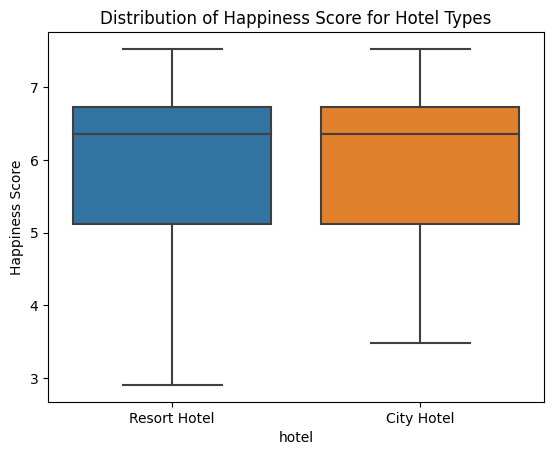

In [ ]:
# happiness score comparison
score_hotel = hotel_bookings_clean[['hotel', 'Happiness Score']]
sns.boxplot(x = score_hotel['hotel'], y = score_hotel['Happiness Score'])
plt.title("Distribution of Happiness Score for Hotel Types")
plt.show()

* Upon comparing the boxplots of happiness scores for Resort Hotels and City Hotels, it is observed that while Resort Hotels exhibit a slightly higher occurrence of extreme values, particularly with scores dipping as low as 3, the majority of scores for both hotel types are concentrated between 5 and 7. Additionally, both types of hotels share a similar median score, approximately around 6.5. Consequently, the data does not indicate a substantial difference in the happiness scores of guests' origin between the two hotel types.

In [ ]:
# Room types in City Hotel
City_room = hotel_bookings_clean[hotel_bookings_clean['hotel'] == 'City Hotel']['reserved_room_type'].value_counts().sort_index()
print(City_room)

A    64523
B     1166
C       11
D    12685
E     1605
F     1893
G      453
Name: reserved_room_type, dtype: int64


In [ ]:
# Room types in Resort Hotel
Resort_room = hotel_bookings_clean[hotel_bookings_clean['hotel'] == 'Resort Hotel']['reserved_room_type'].value_counts().sort_index()
print(Resort_room)

A    25634
B        3
C      985
D     8922
E     5709
F     1212
G     1756
H      654
L        6
Name: reserved_room_type, dtype: int64


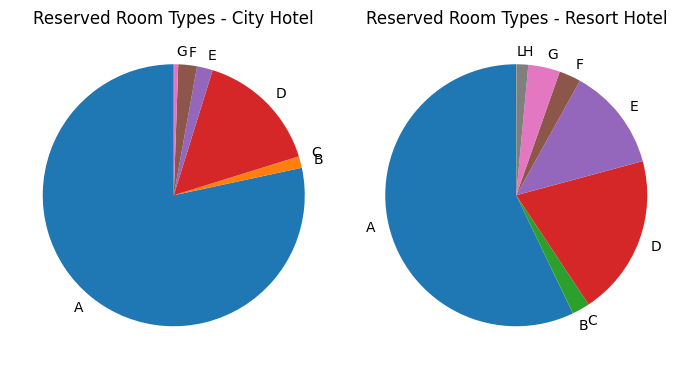

In [ ]:
# Plot for City Hotel
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.pie(City_room, labels=City_room.index, startangle=90)
plt.title('Reserved Room Types - City Hotel')

# Plot for Resort Hotel
plt.subplot(1, 2, 2)
plt.pie(Resort_room, labels=Resort_room.index, startangle=90)
plt.title('Reserved Room Types - Resort Hotel')
plt.tight_layout()
plt.show()


* Upon examining the distribution of room types offered by different hotel types, it becomes evident that the Resort Hotel provides a greater variety of room types compared to the City Hotel.

* Analyzing the Pie charts, it is apparent that both hotel types predominantly receive reservations for room types A and D. Additionally, the Resort Hotel has a relatively larger share of bookings for room type E compared to the City Hotel.

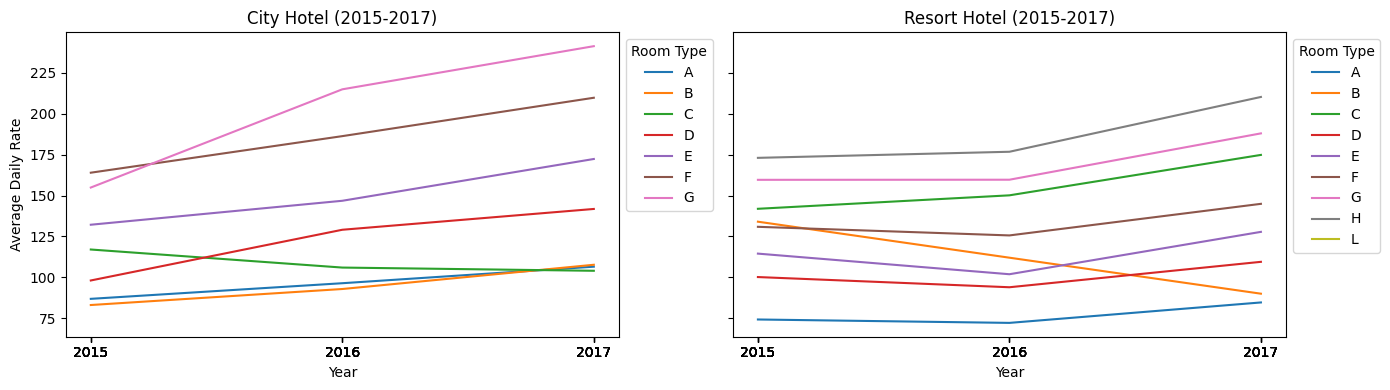

In [ ]:
# pricing dynamic throught the year

# average daily price per room for each room type in City Hotel 2015 - 2017
City_rate = hotel_bookings_clean[hotel_bookings_clean['hotel'] == 'City Hotel'][['hotel', 'reserved_room_type', 'adr', 'arrival_date_year']]
City_ave_rate = City_rate.groupby(['reserved_room_type', 'arrival_date_year'])['adr'].mean().reset_index()

# average daily price per room for each room type in Resort Hotel 2015 - 2017
Resort_rate = hotel_bookings_clean[hotel_bookings_clean['hotel'] == 'Resort Hotel'][['hotel', 'reserved_room_type', 'adr', 'arrival_date_year']]
Resort_ave_rate = Resort_rate.groupby(['reserved_room_type', 'arrival_date_year'])['adr'].mean().reset_index()

# Plot line plot
g, ax = plt.subplots(1,2, figsize=(14,4), sharey= True)

sns.lineplot(x='arrival_date_year', y='adr', hue='reserved_room_type', data = City_ave_rate, ax = ax[0])
ax[0].set_title('City Hotel (2015-2017)')
ax[0].set_ylabel('Average Daily Rate')
ax[0].set_xlabel('Year')
ax[0].legend(title='Room Type', loc='upper left', bbox_to_anchor=(1,1))
ax[0].set_xticks(City_ave_rate['arrival_date_year'])

sns.lineplot(x='arrival_date_year', y='adr', hue='reserved_room_type', data = Resort_ave_rate, ax = ax[1])
ax[1].set_title('Resort Hotel (2015-2017)')
ax[1].set_xlabel('Year')
ax[1].legend(title='Room Type', loc='upper left', bbox_to_anchor=(1,1))
ax[1].set_xticks(Resort_ave_rate['arrival_date_year'])

plt.tight_layout()
plt.show()


* I computed the average daily price per room for each room type in both types of hotels and created a line graph to illustrate the changes from 2015 to 2017.

* The graph reveals significant differences in room rate trends between the two hotel types:

a. Overall, across both hotel types, the average room prices are increasing annually, with the exception of room type B in the Resort Hotel, which experiences a decreasing trend.

b. In City Hotel, room type G emerges as the most expensive category, exhibiting a consistent yearly price increase. Conversely, room type H claims the title of the priciest room type in Resort Hotel.

c. Building on the insights from the previous analysis, where room types A and D garnered the highest number of reservations, and Resort Hotel saw a substantial portion of bookings for room type E. In the line chart, it becomes apparent that room types A, D, and E have the lowest rates in Resort Hotel. In City Hotel, the rates for both room types A and D are higher than Resort Hotel.

**Summary:**

In addressing my initial research question, I delved into the business patterns of different hotel types—Resort and City hotels. The two hotel categories stand out due to distinct differences in location, capacity, and amenities.

a.  Introduction to Hotel Types:

- City Hotel: Typically situated in urban centers or business districts, City Hotels offer convenience for transportation and business-related stays. They feature smaller capacities and a more limited range of room types and amenities.

- Resort Hotel: Positioned in scenic or recreational areas, Resort Hotels boast larger capacities, a diverse array of room types, and a wide selection of amenities, creating an environment conducive to leisure and relaxation.

b.  Key Findings from Analysis:

- Guest Origin:
Both hotel types exhibit no significant disparity in the happiness score of guests' origin. The majority of guests in both hotels originate from regions with high happiness scores.

- Room Types:
Resort Hotels offer a more extensive variety of room types compared to City Hotels. Notably, room types A and D emerge as the most popular choices across both hotel categories.

- Pricing Dynamics:
Analysis reveals that the most popular room types tend to have lower prices. However, City Hotel registers relatively higher prices for these popular room types compared to Resort Hotel.

**(2) Market Trends in the Hotel Industry:**


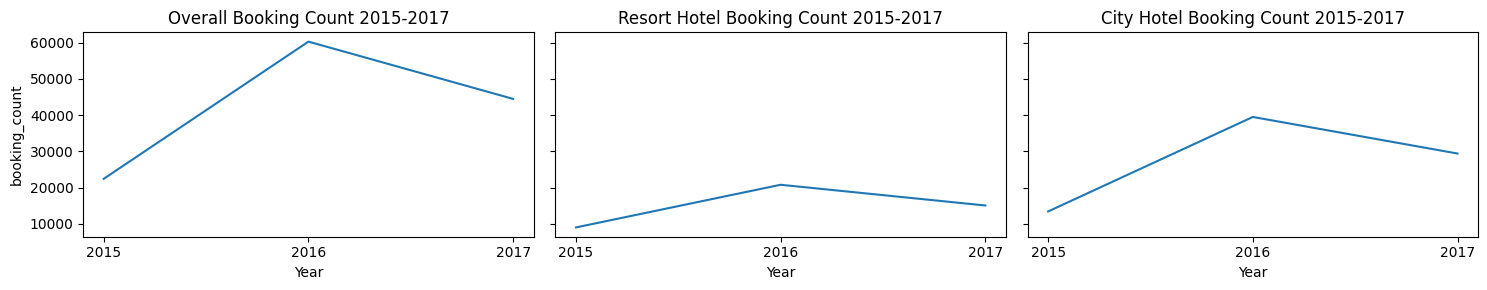

In [ ]:
# Booking Counts Annualy Trends

# Booking counts for overall, Resort Hotel, and City Hotel
year_booking = hotel_bookings_clean.groupby('arrival_date_year').size().reset_index().rename(columns = {0: 'booking_count'})
Resort_year_booking = hotel_bookings_clean[hotel_bookings_clean['hotel'] == 'Resort Hotel'].groupby('arrival_date_year').size().reset_index().rename(columns = {0: 'booking_count'})
City_year_booking = hotel_bookings_clean[hotel_bookings_clean['hotel'] == 'City Hotel'].groupby('arrival_date_year').size().reset_index().rename(columns = {0: 'booking_count'})

g, ax = plt.subplots(1,3, figsize=(15,3), sharey = True)

sns.lineplot(x = 'arrival_date_year', y = 'booking_count', data = year_booking, ax = ax[0])
ax[0].set_title('Overall Booking Count 2015-2017')
ax[0].set_xlabel('Year')
ax[0].set_xticks(year_booking['arrival_date_year'])

sns.lineplot(x = 'arrival_date_year', y = 'booking_count', data = Resort_year_booking, ax = ax[1])
ax[1].set_title('Resort Hotel Booking Count 2015-2017')
ax[1].set_xlabel('Year')
ax[1].set_xticks(Resort_year_booking['arrival_date_year'])

sns.lineplot(x = 'arrival_date_year', y = 'booking_count', data = City_year_booking, ax = ax[2])
ax[2].set_title('City Hotel Booking Count 2015-2017')
ax[2].set_xlabel('Year')
ax[2].set_xticks(City_year_booking['arrival_date_year'])

plt.tight_layout()
plt.show()

* I plotted the booking counts for total hotels, Resort hotels, and City hotels from 2015 to 2017 to investigate annual changes.

* The visualization reveals an increase in booking counts from 2015 to 2016, with 2016 serving as a turning point. Subsequently, the booking counts started to decrease for overall hotel bookings. This trend appears consistent across different hotel types, showcasing a pattern unaffected by the hotel category.

* The booking counts for City hotels consistently surpass those for Resort hotels every year.

<ipython-input-23-ab9124703967>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = month_booking_2015['arrival_date_month'], rotation = 90)
<ipython-input-23-ab9124703967>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels = month_booking_2016['arrival_date_month'], rotation = 90)
<ipython-input-23-ab9124703967>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(labels = month_booking_2017['arrival_date_month'], rotation = 90)


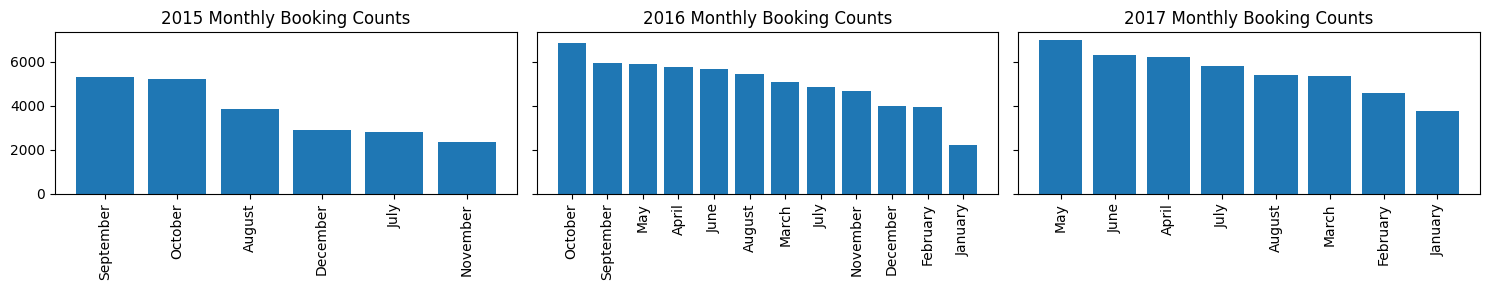

In [ ]:
# Booking Counts Monthly Trends

# Booking counts for total hotel
month_booking_2015 = hotel_bookings_clean[hotel_bookings_clean['arrival_date_year'] == 2015].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)
month_booking_2016 = hotel_bookings_clean[hotel_bookings_clean['arrival_date_year'] == 2016].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)
month_booking_2017 = hotel_bookings_clean[hotel_bookings_clean['arrival_date_year'] == 2017].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)

g, ax = plt.subplots(1,3, figsize=(15,3), sharey = True)

ax[0].bar(x = month_booking_2015['arrival_date_month'], height = month_booking_2015['booking_count'])
ax[0].set_title("2015 Monthly Booking Counts")
ax[0].set_xticklabels(labels = month_booking_2015['arrival_date_month'], rotation = 90)

ax[1].bar(x = month_booking_2016['arrival_date_month'], height = month_booking_2016['booking_count'])
ax[1].set_title("2016 Monthly Booking Counts")
ax[1].set_xticklabels(labels = month_booking_2016['arrival_date_month'], rotation = 90)

ax[2].bar(x = month_booking_2017['arrival_date_month'], height = month_booking_2017['booking_count'])
ax[2].set_title("2017 Monthly Booking Counts")
ax[2].set_xticklabels(labels = month_booking_2017['arrival_date_month'], rotation = 90)

plt.tight_layout()
plt.show()

<ipython-input-24-c601b5333489>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = Resort_month_booking_2015['arrival_date_month'], rotation = 90)
<ipython-input-24-c601b5333489>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels = Resort_month_booking_2016['arrival_date_month'], rotation = 90)
<ipython-input-24-c601b5333489>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(labels = Resort_month_booking_2017['arrival_date_month'], rotation = 90)


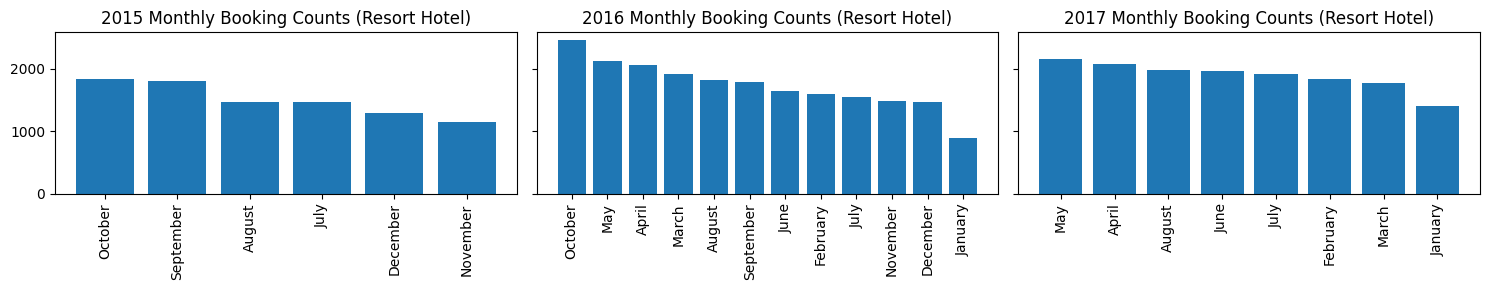

In [ ]:
# Booking counts for Resort Hotel
Resort_month_booking_2015 = hotel_bookings_clean[(hotel_bookings_clean['arrival_date_year'] == 2015) & (hotel_bookings_clean['hotel'] == 'Resort Hotel')].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)
Resort_month_booking_2016 = hotel_bookings_clean[(hotel_bookings_clean['arrival_date_year'] == 2016) & (hotel_bookings_clean['hotel'] == 'Resort Hotel')].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)
Resort_month_booking_2017 = hotel_bookings_clean[(hotel_bookings_clean['arrival_date_year'] == 2017) & (hotel_bookings_clean['hotel'] == 'Resort Hotel')].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)

g, ax = plt.subplots(1,3, figsize=(15,3), sharey = True)

ax[0].bar(x = Resort_month_booking_2015['arrival_date_month'], height = Resort_month_booking_2015['booking_count'])
ax[0].set_title("2015 Monthly Booking Counts (Resort Hotel)")
ax[0].set_xticklabels(labels = Resort_month_booking_2015['arrival_date_month'], rotation = 90)

ax[1].bar(x = Resort_month_booking_2016['arrival_date_month'], height = Resort_month_booking_2016['booking_count'])
ax[1].set_title("2016 Monthly Booking Counts (Resort Hotel)")
ax[1].set_xticklabels(labels = Resort_month_booking_2016['arrival_date_month'], rotation = 90)

ax[2].bar(x = Resort_month_booking_2017['arrival_date_month'], height = Resort_month_booking_2017['booking_count'])
ax[2].set_title("2017 Monthly Booking Counts (Resort Hotel)")
ax[2].set_xticklabels(labels = Resort_month_booking_2017['arrival_date_month'], rotation = 90)

plt.tight_layout()
plt.show()


<ipython-input-25-f4a53f8761b8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(labels = City_month_booking_2015['arrival_date_month'], rotation = 90)
<ipython-input-25-f4a53f8761b8>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(labels = City_month_booking_2016['arrival_date_month'], rotation = 90)
<ipython-input-25-f4a53f8761b8>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(labels = City_month_booking_2017['arrival_date_month'], rotation = 90)


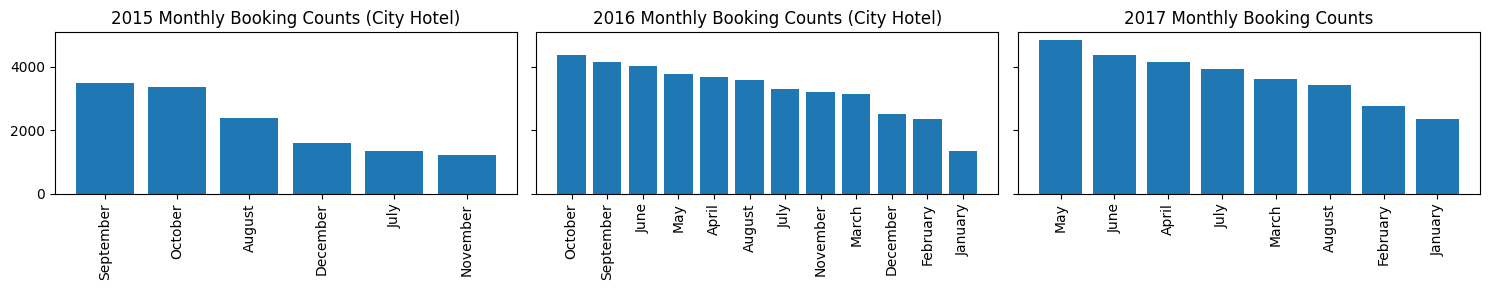

In [ ]:
# # Booking counts for City Hotel
City_month_booking_2015 = hotel_bookings_clean[(hotel_bookings_clean['arrival_date_year'] == 2015) & (hotel_bookings_clean['hotel'] == 'City Hotel')].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)
City_month_booking_2016 = hotel_bookings_clean[(hotel_bookings_clean['arrival_date_year'] == 2016) & (hotel_bookings_clean['hotel'] == 'City Hotel')].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)
City_month_booking_2017 = hotel_bookings_clean[(hotel_bookings_clean['arrival_date_year'] == 2017) & (hotel_bookings_clean['hotel'] == 'City Hotel')].groupby('arrival_date_month').size().reset_index().rename(columns = {0: 'booking_count'}).sort_values(by = 'booking_count', ascending = False)

g, ax = plt.subplots(1,3, figsize=(15,3), sharey = True)

ax[0].bar(x = City_month_booking_2015['arrival_date_month'], height = City_month_booking_2015['booking_count'])
ax[0].set_title("2015 Monthly Booking Counts (City Hotel)")
ax[0].set_xticklabels(labels = City_month_booking_2015['arrival_date_month'], rotation = 90)

ax[1].bar(x = City_month_booking_2016['arrival_date_month'], height = City_month_booking_2016['booking_count'])
ax[1].set_title("2016 Monthly Booking Counts (City Hotel)")
ax[1].set_xticklabels(labels = City_month_booking_2016['arrival_date_month'], rotation = 90)

ax[2].bar(x = City_month_booking_2017['arrival_date_month'], height = City_month_booking_2017['booking_count'])
ax[2].set_title("2017 Monthly Booking Counts")
ax[2].set_xticklabels(labels = City_month_booking_2017['arrival_date_month'], rotation = 90)

plt.tight_layout()
plt.show()

* As the dataset lacks information for every month in each year, my observations are limited to the recorded months.

* In general, despite minor fluctuations in booking counts for the displayed months, September and October stood out as the peak booking months in 2015 and 2016, while May claimed the highest bookings in 2017.

* These trends appear consistent across different hotel types, showcasing a pattern unaffected by the hotel category.

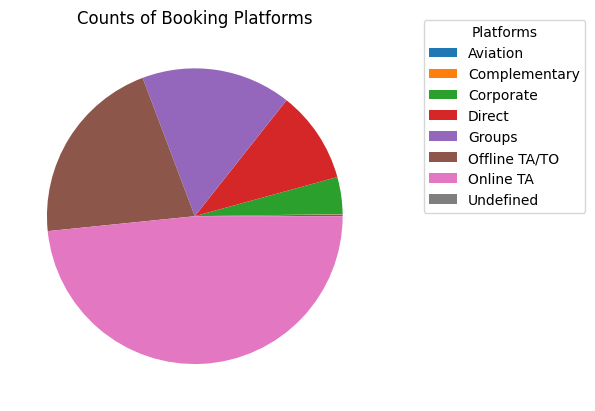

In [ ]:
# Platfrom to Make Reservation
booking_platfrom = hotel_bookings_clean.groupby('market_segment').size().reset_index().rename(columns = {0: 'counts'})

plt.pie(booking_platfrom['counts'], labels = None)
plt.legend(booking_platfrom['market_segment'], title='Platforms', bbox_to_anchor=(1.1, 1.05))
plt.title('Counts of Booking Platforms')
plt.show()

* Based on the pie chart above, the three predominant platforms for booking hotel rooms in the market from 2015 to 2017 are Online TA, Offline TA/TO, and Groups.

* Online TA (Travel Agencies): Third-party platforms like Bookings, Expedia, or Agoda.

* Offline TA/TO (Traditional Agencies/Tour Operators): Traditional travel agencies or tour operators, such as a local travel agency. Agencies where bookings are made through in-person visits, phone calls, or email correspondence.

* Groups: Refers to reservations made for a large number of people or multiple rooms as part of a group booking. Instances where like a company organizing a conference, reserve a block of rooms for their attendees.

**Summary:**

In this research question, my focus was on understanding market trends in hotel bookings.

* Number of Bookings:
 At a high level, the booking counts have shown a decline since 2016. This trend may be linked to events or policies during that period, requiring further data for thorough investigation. Additionally, the peak booking months throughout the year are September, October, and May.

* Booking Platforms: Close to half of the guests opted for third-party online platforms to make their reservations. Notably, a significant proportion of bookings are attributed to large groups, such as events organized by companies or other organizations.

**(3) Cancellation Prediction Model:**

* Target: "is_canceled" (0: not canceled; 1: canceled) -> known -> Supervised Learning -> tartget is binary -> Classification method -> Random Forest Algorithm.
* Features:\
"lead_time" (days between booking and arrival)\
"market_segment" (reservation method)\
"deposit_type" (type of deposit)\
"adr" (average daily rate per room)

In [ ]:
# Check the correlation between target and features

# correlation between target and two continuous features, I will use point-biserial method to find out the correlation between binary and continous variables
from scipy.stats import pointbiserialr

for column in ['lead_time', 'adr']:
    correlation, p_value = pointbiserialr(hotel_bookings_clean[column], hotel_bookings_clean['is_canceled'])
    print(f'{column}: correlation={correlation:.2f}, p-value={p_value:.4f}')

lead_time: correlation=0.26, p-value=0.0000
adr: correlation=0.05, p-value=0.0000


* For "lead_tiem" feature, the positive correlatin of 0.26 with a very low p-value suggests a moderate and statistically significant positive relationship with target variable.

* For "adr", the positive correlation of 0.05 with a very low p-value suggests a weaker but still statistically significant positive relationship with target variable.

In [ ]:
# correlation between target and two categorical features,  I will use Cramer's V method to find out the correlation between binary and categorical variables:
from scipy.stats import chi2_contingency

for column in ['market_segment', 'deposit_type']:
    contingency_table = pd.crosstab(hotel_bookings_clean[column], hotel_bookings_clean['is_canceled'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = np.min(contingency_table.shape)
    cramers_v = np.sqrt(chi2 / (len(hotel_bookings_clean) * (n - 1)))
    print(f'{column}: Cramér\'s V={cramers_v:.2f}')

market_segment: Cramér's V=0.25
deposit_type: Cramér's V=0.48


* For "market_segment" feature, a Cramér's V of 0.25 suggests a moderate association with target variable.

* For "deposit_type" feature, a Cramér's V of 0.48 suggests a stronger association with target variable.

* Since all 4 potential features are correlated to target variable, I decided to used all of them to build machine learning model.

In [ ]:
# encode categorical features
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
  label_encoder = LabelEncoder()
  df['market_segment'] = label_encoder.fit_transform(df['market_segment'])
  df['deposit_type'] = label_encoder.fit_transform(df['deposit_type'])
  return df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

def train_and_evaluate_RandomForest_model(X,y):
    # Define model
    clf = RandomForestClassifier(max_leaf_nodes=len(X.columns), random_state=0)

    # Split train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60, test_size=0.2)

    # Fit classifier on training data
    clf.fit(X_train, y_train)

    # Predict
    predictions_test = clf.predict(X_test)

    # Check accuracy
    accuracy = accuracy_score(y_true=y_test, y_pred=predictions_test)
    print(f'Testing data accuracy: {accuracy}')

    return clf


In [ ]:
# Define features X and target y
X = hotel_bookings_clean[['adr', 'market_segment', 'lead_time', 'deposit_type']]
y = hotel_bookings_clean[['is_canceled']]

# Preprocess the categorical features
X = preprocess_data(X)

# train the model and evaluate the accuracy
trained_model = train_and_evaluate_RandomForest_model(X,y)


<ipython-input-38-786d7644b405>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market_segment'] = label_encoder.fit_transform(df['market_segment'])
<ipython-input-38-786d7644b405>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deposit_type'] = label_encoder.fit_transform(df['deposit_type'])
<ipython-input-39-7a45ebf49f66>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train

Testing data accuracy: 0.7512183618927841


**Summary:**

* In this section, I conducted predictive analysis with the objective of constructing a model to anticipate cancellations for hotel bookings.

* I designated "is_canceled" as the target variable, turning the task into supervised learning. Given the binary nature of the target variable, I opted for the Random Forest classification method to train the model, aiming for improved accuracy compared to a single decision tree.

* To enhance code organization and reusability, I compartmentalized the process into two main components: encoding categorical variables and training and evaluating the model. This modular approach allows for easy application to new datasets, facilitating future predictions.

* The model achieved a 75% accuracy rate in predicting cancellations.

### 5. Limitations:

* Lack of Information:

During the dataset processing and analysis, a notable limitation emerged regarding the absence of booking information for every month in each year from 2015 to 2017. Consequently, the observations and findings presented in this report are confined to the available months within the dataset. This limitation may impact the generalizability of trends over the excluded time periods.

* Uncertain Representativeness:

The dataset lacks essential background information, such as the specific locations of the hotels, details about the sampling method employed, and the proportion of the dataset corresponding to each hotel type or region. The absence of this contextual information raises concerns about the dataset's representativeness for the entire population of hotels. Consequently, the findings derived from this dataset should be regarded as indicative rather than conclusive, offering insights into general trends within the hotel industry without comprehensive coverage of all potential factors.